In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

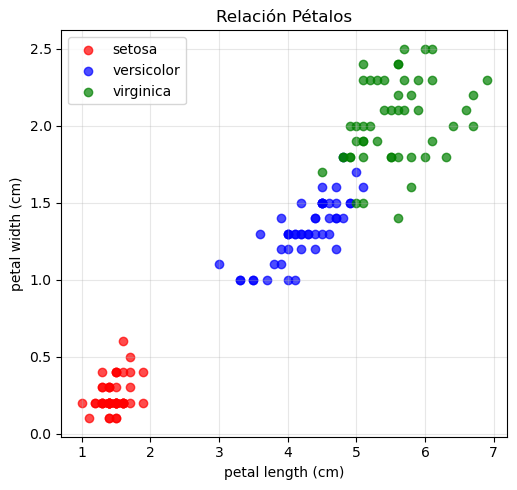

In [16]:
plt.figure(figsize=(15, 5))

# # Subplot 1: Datos originales por clases reales
# plt.subplot(1, 3, 1)
# colors = ['red', 'blue', 'green']
# for i in range(3):
#     plt.scatter(X[y == i, 0], X[y == i, 1], 
#                c=colors[i], label=target_names[i], alpha=0.7)
# plt.xlabel(feature_names[0])
# plt.ylabel(feature_names[1])
# plt.title('Datos Originales - Por Especies Reales')
# plt.legend()
# plt.grid(True, alpha=0.3)

# # Subplot 2: Visualización con más características
# plt.subplot(1, 3, 2)
# scatter = plt.scatter(X[:, 0], X[:, 2], c=y, cmap='viridis', alpha=0.7)
# plt.xlabel(feature_names[0])
# plt.ylabel(feature_names[2])
# plt.title('Relación Largo Sépalo vs Largo Pétalo')
# plt.colorbar(scatter, label='Especies')
# plt.grid(True, alpha=0.3)

# Subplot 3: Pairplot simplificado
plt.subplot(1, 3, 3)
for i in range(3):
    plt.scatter(X[y == i, 2], X[y == i, 3], 
               c=colors[i], label=target_names[i], alpha=0.7)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.title('Relación Pétalos')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

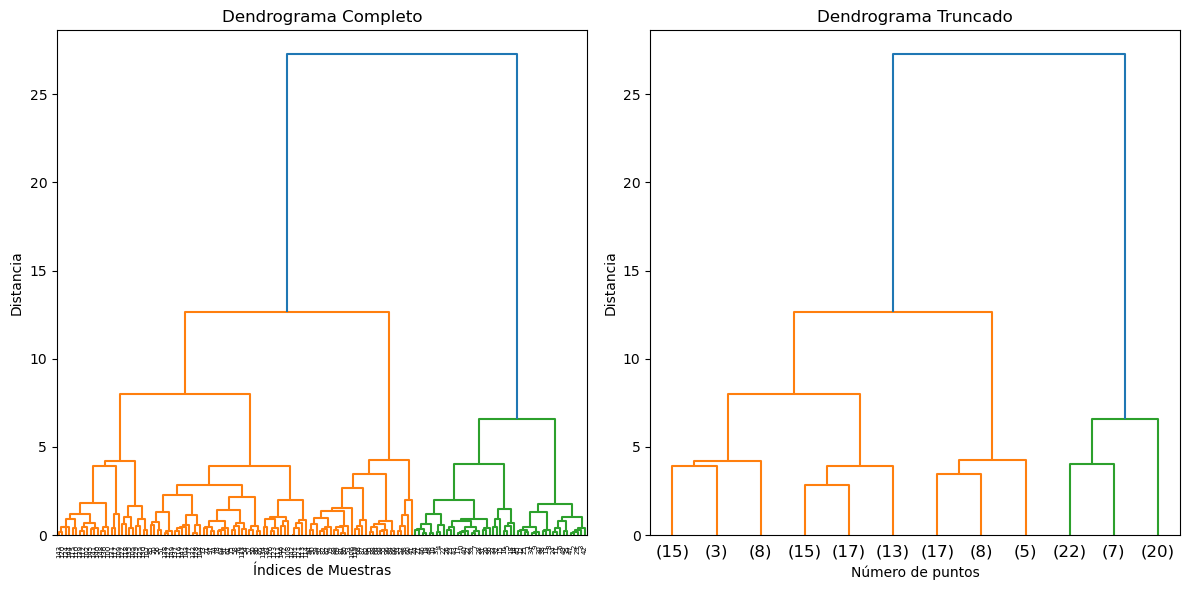

In [4]:
plt.figure(figsize=(12, 6))

# Crear dendrograma
linked = linkage(X_scaled, method='ward')

plt.subplot(1, 2, 1)
dendrogram(linked, orientation='top', 
           distance_sort='descending', 
           show_leaf_counts=True)
plt.title('Dendrograma Completo')
plt.xlabel('Índices de Muestras')
plt.ylabel('Distancia')

# Dendrograma truncado para mejor visualización
plt.subplot(1, 2, 2)
dendrogram(linked, orientation='top', 
           distance_sort='descending', 
           show_leaf_counts=True,
           truncate_mode='lastp',
           p=12)
plt.title('Dendrograma Truncado')
plt.xlabel('Número de puntos')
plt.ylabel('Distancia')

plt.tight_layout()
plt.show()


In [5]:
agg_clustering = AgglomerativeClustering(
    n_clusters=3,  # Sabemos que hay 3 especies en Iris
    metric='euclidean',
    linkage='ward'
)

# Predecir los clusters
cluster_labels = agg_clustering.fit_predict(X_scaled)

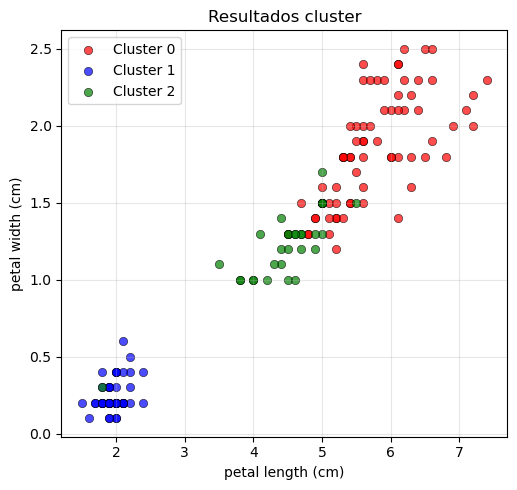

In [17]:
plt.figure(figsize=(15, 5))

# # 1 tabla
# plt.subplot(1, 3, 1)
# for i in range(3):
#     plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], 
#                c=colors[i], label=f'Cluster {i}', alpha=0.7)
# plt.xlabel(feature_names[0])
# plt.ylabel(feature_names[1])
# plt.title('Resultado del Clustering - Grupos Encontrados')
# plt.legend()
# plt.grid(True, alpha=0.3)

# # 2 tabla
# plt.subplot(1, 3, 2)
# scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
# plt.xlabel(feature_names[0])
# plt.ylabel(feature_names[1])
# plt.title('Asignación de Clusters')
# plt.colorbar(scatter, label='Cluster')
# plt.grid(True, alpha=0.3)

# 3 tabla
plt.subplot(1, 3, 3)


for i in range(3):
    plt.scatter(X[cluster_labels == i, 2] + 0.5, X[cluster_labels == i, 3], 
               c=colors[i], label=f'Cluster {i}', alpha=0.7,
               edgecolor='black', linewidth=0.5)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.title('Resultados cluster')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


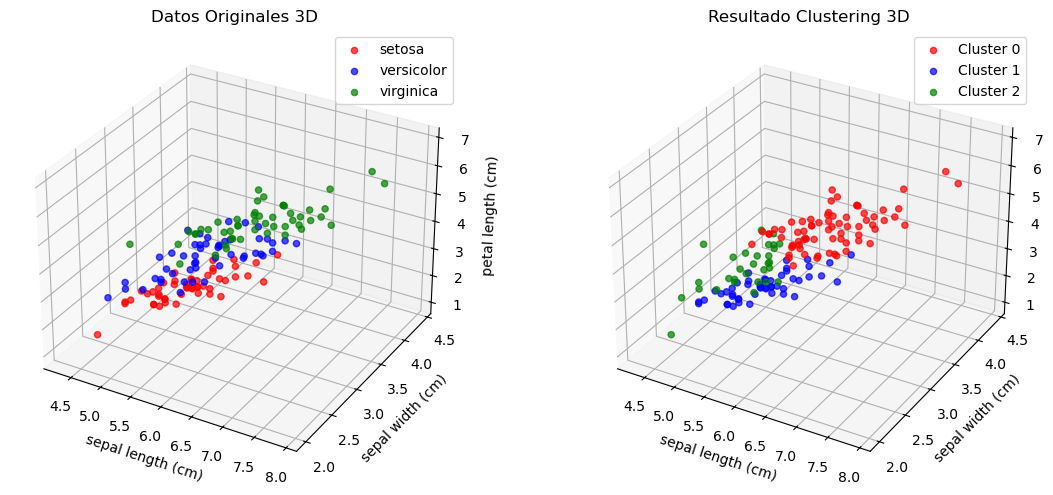

In [8]:
try:
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(12, 5))
    
    # 3D - Datos originales
    ax1 = fig.add_subplot(121, projection='3d')
    for i in range(3):
        ax1.scatter(X[y == i, 0], X[y == i, 1], X[y == i, 2], 
                   c=colors[i], label=target_names[i], alpha=0.7)
    ax1.set_xlabel(feature_names[0])
    ax1.set_ylabel(feature_names[1])
    ax1.set_zlabel(feature_names[2])
    ax1.set_title('Datos Originales 3D')
    ax1.legend()
    
    # 3D - Clustering result
    ax2 = fig.add_subplot(122, projection='3d')
    for i in range(3):
        ax2.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], X[cluster_labels == i, 2], 
                   c=colors[i], label=f'Cluster {i}', alpha=0.7)
    ax2.set_xlabel(feature_names[0])
    ax2.set_ylabel(feature_names[1])
    ax2.set_zlabel(feature_names[2])
    ax2.set_title('Resultado Clustering 3D')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("Visualización 3D no disponible")

✅ Gráficas guardadas como PNG y PDF!


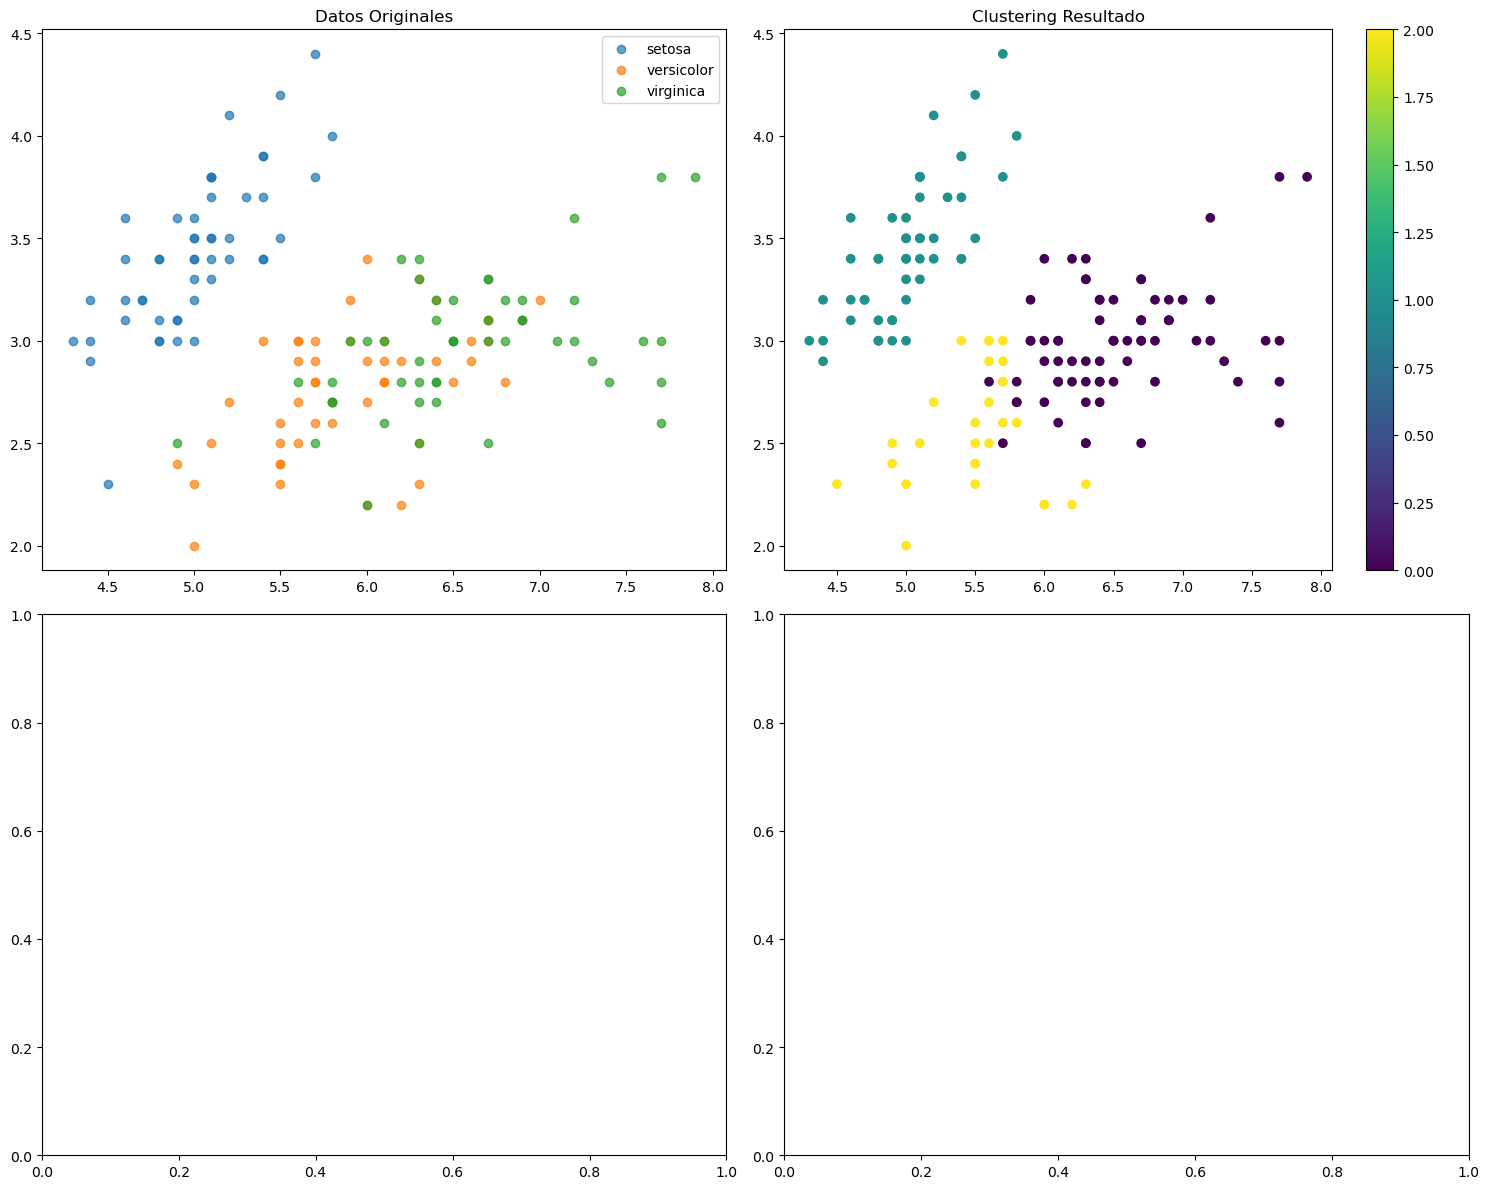

In [11]:
# Crear y guardar gráficas
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfica 1: Datos originales
for i in range(3):
    axes[0,0].scatter(X[y == i, 0], X[y == i, 1], label=iris.target_names[i], alpha=0.7)
axes[0,0].set_title('Datos Originales')
axes[0,0].legend()

# Gráfica 2: Resultado clustering
scatter = axes[0,1].scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
axes[0,1].set_title('Clustering Resultado')
plt.colorbar(scatter, ax=axes[0,1])


plt.tight_layout()

# GUARDAR GRÁFICA
plt.savefig('visualizaciones_clustering.png', dpi=300, bbox_inches='tight')
plt.savefig('visualizaciones_clustering.pdf', bbox_inches='tight')
print("✅ Gráficas guardadas como PNG y PDF!")